## Introdução
O projeto será realizado para a loja online Ice, especializada em venda de videogames no mundo todo, o dataframe contém avaliações de usuários e especialistas, gêneros, plataformas e dados históricos sobre vendas de jogos que estão disponíveis e em aberto. O projeto verificará padrões que determinam se um jogo tem sucesso ou não. Isso permitirá que identifique potenciais grandes vencedores e planeje campanhas publicitárias.

## Etapa 1. Visão geral dos dados

Serão carregados as bibliotecas que acredito que serão úteis no desempenhar das análises, importado o dataframe, analisado as informações contidas no dataframe, correções necessárias para melhor avaliação, serão analisadas se há valores ausentes e após análise as tomadas de decisões serão explicadas na conclusão intermediária.

In [1]:
# Carregando todas as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt

In [2]:
df = pd.read_csv('/datasets/games.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [5]:
#Colocando as letras das colunas em minúsculo e o ano em datetime.
df.columns = df.columns.str.lower()

In [6]:
df['year_of_release'] = pd.to_datetime(df['year_of_release'], format='%Y')

In [7]:
df['year_of_release'] = df['year_of_release'].dt.strftime('%Y')

### Avaliando os valores ausentes e preenchimento

In [8]:
#Avaliando a quantidade de valores ausentes por coluna
df.isnull().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [9]:
df.loc[df['year_of_release'].isnull(), ['name']]

,name
183,Madden NFL 2004
377,FIFA Soccer 2004
456,LEGO Batman: The Videogame
475,wwe Smackdown vs. Raw 2006
609,Space Invaders
...,...
16373,PDC World Championship Darts 2008
16405,Freaky Flyers
16448,Inversion
16458,Hakuouki: Shinsengumi Kitan


In [10]:
#Os valores ausentes nas colunas serão substituídos com base nos nomes que contenham o preenchimento tomando como base a coluna `name`
df['year_of_release'] = df.groupby('name')['year_of_release'].apply(lambda x: x.fillna(method='ffill').fillna(method='bfill'))

In [11]:
df['critic_score'] = df.groupby('name')['critic_score'].apply(lambda x: x.fillna(method='ffill').fillna(method='bfill'))

In [12]:
df['user_score'] = df.groupby('name')['user_score'].apply(lambda x: x.fillna(method='ffill').fillna(method='bfill'))

In [13]:
df['rating'] = df.groupby('name')['rating'].apply(lambda x: x.fillna(method='ffill').fillna(method='bfill'))

In [14]:
df['genre'] = df.groupby('name')['genre'].apply(lambda x: x.fillna(method='ffill').fillna(method='bfill'))

### Justificativa do preenchimento dos valores vazios

Entendo que podemos ter valores que se repetem na coluna `name` que nos auxilie a preencher as colunas com valores vazios, nesse sentido foi utilizado o 'ffil' e 'bfill' que auxilia a preencher furos na série reindexada.

In [15]:
# Avaliação dos valores ausentes após o preenchimento 
df.isna().sum()

name                  2
platform              0
year_of_release     148
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       7617
user_score         6272
rating             6329
dtype: int64

In [16]:
# Os valores ausentes nas coluna critic_score e user_score terão os valores substituídos por 0
df['critic_score'].fillna(0.0, inplace=True)

In [17]:
df['user_score'].fillna(0.0, inplace=True)

In [18]:
df['rating'].value_counts()

E       4153
T       3090
M       1653
E10+    1472
EC        10
K-A        4
RP         3
AO         1
Name: rating, dtype: int64

In [19]:
# Os valores ausentes da coluna rating serão subistituídos pela moda da própria coluna.
mode_rating = df['rating'].mode().values[0]
df['rating'].fillna(mode_rating, inplace=True)

In [20]:
df.isna().sum()

name                 2
platform             0
year_of_release    148
genre                2
na_sales             0
eu_sales             0
jp_sales             0
other_sales          0
critic_score         0
user_score           0
rating               0
dtype: int64

In [21]:
# Calculando a porcentagem dos valores ausentes
percent_missing = df[['name', 'year_of_release', 'genre']].isna().mean() * 100
percent_missing

name               0.011965
year_of_release    0.885432
genre              0.011965
dtype: float64

In [22]:
# Os valores ausentes que restaram não terão uma representatidade se excluído
df = df.dropna(subset=['name', 'year_of_release', 'genre']).copy()

#### Conclusão intermediária

Foi notado que existiam muitos valores ausentes que se houvesse uma exclusão seria prejudicial para análise, como decisão foi avaliado que a coluna name possuia nomes específicdos que poderiam se repetir ao longo da coluna e um desses valores poderiam auxiliar no preenchimento das demais colunas.

Após realização desse preenchimento, entendi que os valores ausentes nas colunas `user_score` e `critic_score` eram valores 0.0 que haviam sido deixados de preencher pelos clientes, por se tratar de valores quantitativos. Já na coluna `rating` por ser uma coluna com informações categóricas a substituição foi feita com o valor que mais se repete na coluna. Quanto as colunas `name`, `year_of_release` e `genre`, a opção foi de exclusão das linhas pois não achei que a ausência delas impactariam as aáçises futuras.

### Cálculo dos totais de vendas

In [23]:
#Calculo de total de vendas (a soma de vendas em todas as regiões) para cada jogo.
df["total_sales"] = df.loc[:, "na_sales":"other_sales"].sum(axis=1)

In [24]:
#Criação de tabela dinâmica e gráfico da quantidade de vendas por ano. 
pd.pivot_table(df, index="year_of_release", values="name", aggfunc="count")

,name
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


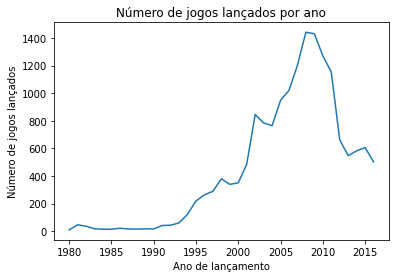

In [25]:
pivot = pd.pivot_table(df, index="year_of_release", values="name", aggfunc="count")
pivot.plot(kind="line", legend=None)

plt.xlabel("Ano de lançamento")
plt.ylabel("Número de jogos lançados")
plt.title("Número de jogos lançados por ano")
plt.show()

In [26]:
# Seleciona as colunas desejadas
df_sales = df[["platform", "year_of_release", "na_sales", "eu_sales", "jp_sales", "other_sales"]]

In [27]:
# Cria uma tabela dinâmica com as vendas por plataforma e ano
pivot_sales = pd.pivot_table(df_sales, index="year_of_release", columns="platform", values=["na_sales", "eu_sales", "jp_sales", "other_sales"], aggfunc="sum")

In [28]:
# Calcula as vendas totais por plataforma
total_sales = pivot_sales.sum()

In [29]:
# Seleciona as plataformas com as maiores vendas totais
top_platforms = total_sales.nlargest(5)

<AxesSubplot:ylabel='Density'>

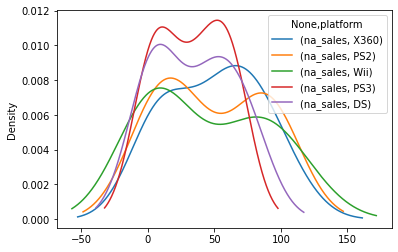

In [30]:
# Cria uma distribuição com base nos dados de vendas de cada ano
pivot_sales[top_platforms.index].plot(kind="density")

In [31]:
# Encontra as plataformas que não têm vendas
no_sales = total_sales[total_sales == 0].index

In [32]:
# Exibe as informações sobre as plataformas com as maiores vendas e as que não têm vendas
print("Plataformas com as maiores vendas totais:\n", top_platforms)
print("\nPlataformas que não têm vendas:\n", no_sales)

Plataformas com as maiores vendas totais:
           platform
na_sales  X360        599.15
          PS2         580.09
          Wii         494.01
          PS3         391.60
          DS          381.38
dtype: float64

Plataformas que não têm vendas:
 MultiIndex([(   'eu_sales',  '3DO'),
            (   'eu_sales',   'GG'),
            (   'eu_sales',   'NG'),
            (   'eu_sales', 'PCFX'),
            (   'eu_sales', 'TG16'),
            (   'eu_sales',   'WS'),
            (   'jp_sales', '2600'),
            (   'na_sales',  '3DO'),
            (   'na_sales',   'GG'),
            (   'na_sales',   'NG'),
            (   'na_sales', 'PCFX'),
            (   'na_sales', 'TG16'),
            (   'na_sales',   'WS'),
            ('other_sales',  '3DO'),
            ('other_sales',   'GG'),
            ('other_sales',   'NG'),
            ('other_sales', 'PCFX'),
            ('other_sales', 'TG16'),
            ('other_sales',   'WS')],
           names=[None, 'platform'])


### Conclusão intermediária
Os lançamentos de jogos nos últimos 5 anos vem caíndo, as plataformas com maiores vendas foi X360 e tivemos várias plataformas listadas anteriormente sem vendas.

## Avaliação de dados mais recentes

Podemos ver que os dados fornecidos têm informações desde 1980 até 2016. No entanto, ao considerar a construção de um modelo para 2017, seria apropriado descartar os dados mais antigos, pois não são relevantes para prever as tendências mais recentes. Portanto, pode ser apropriado restringir o conjunto de dados aos últimos 10 anos ou menos (por exemplo, 2007-2016) para construir um modelo para 2017. 

In [33]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0.0,0.0,E,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0.0,0.0,E,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0.0,0.0,E,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,0.0,0.0,E,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0.0,0.0,E,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,0.0,0.0,E,0.01


In [34]:
#ajustando o erro do tipo de dados por coluna.
df['user_score'] = df['user_score'].replace('tbd', np.nan).astype(float)

In [35]:
df['year_of_release'] = df['year_of_release'].replace('tbd', np.nan).astype(int)

In [36]:
#restringindo o conjunto de dados aos últimos 10 anos
df_rest = df[df['year_of_release'] >= 2007]

In [37]:
# Agrupar por plataforma e calcular as vendas globais
sales_by_platform = df_rest.groupby('platform')['total_sales'].sum().reset_index()

In [38]:
# Ordenar em ordem decrescente
sales_by_platform = sales_by_platform.sort_values(by='total_sales', ascending=False)

In [39]:
# Mostrar as 10 plataformas com as maiores vendas globais
top_platforms = sales_by_platform.head(10)
top_platforms

,platform,total_sales
7,PS3,913.56
13,X360,905.60
11,Wii,763.12
2,DS,537.04
8,PS4,314.14
0,3DS,258.53
9,PSP,186.39
5,PC,163.61
6,PS2,163.44
15,XOne,159.32


In [40]:
# Selecionar as plataformas para o gráfico
selected_platforms = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'GBA', 'PSP', 'PS4', 'PC']

In [41]:
# Filtrar o dataframe para as plataformas selecionadas
selected_df = df_rest[df_rest['platform'].isin(selected_platforms)]

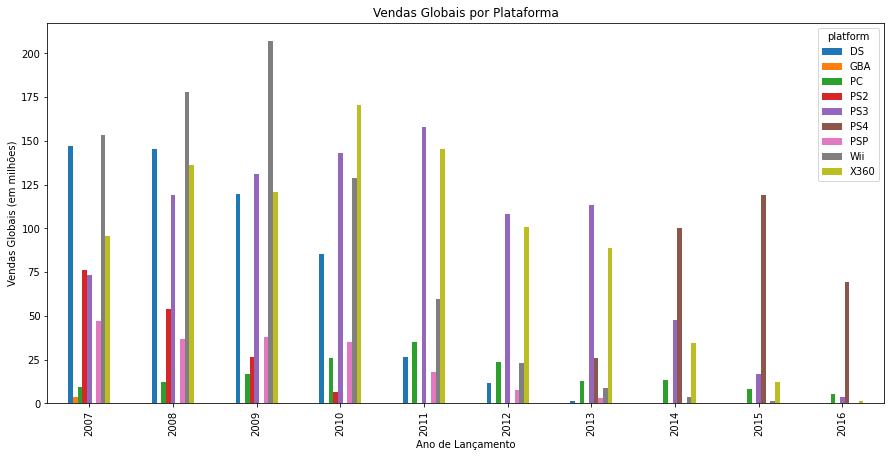

In [42]:
# Criar um gráfico de barras mostrando as vendas globais para cada plataforma ao longo do tempo
platform_sales = selected_df.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
platform_sales.plot(kind='bar', stacked=False, figsize=(15,7))

# Configurar o gráfico
plt.title('Vendas Globais por Plataforma')
plt.xlabel('Ano de Lançamento')
plt.ylabel('Vendas Globais (em milhões)')
plt.show()

### Conclusão intermediária
Através da visualização do gráico que até 2013 , entre altos e baixos, a plataforma mais vendida foi o PS3, após 2013 o PS4 se tornou a plataforma mais vendida.

### Criação de gráfico de caixa

In [43]:
# selecionar apenas as colunas de interesse
cols = ['platform', 'total_sales']

In [44]:
# agrupar as vendas totais por plataforma
grouped = df_rest[cols].groupby('platform')

<Figure size 864x576 with 0 Axes>

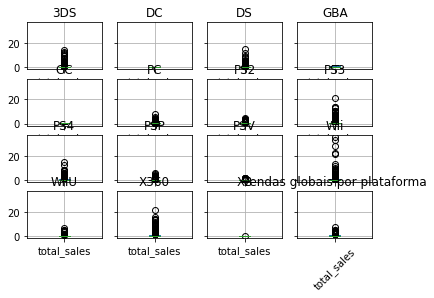

In [45]:
# criar o diagrama de caixa
plt.figure(figsize=(12,8))
grouped.boxplot()
plt.title('Vendas globais por plataforma')
plt.ylabel('Vendas (milhões)')
plt.xticks(rotation=45)
plt.show()

(0.0, 3.0)

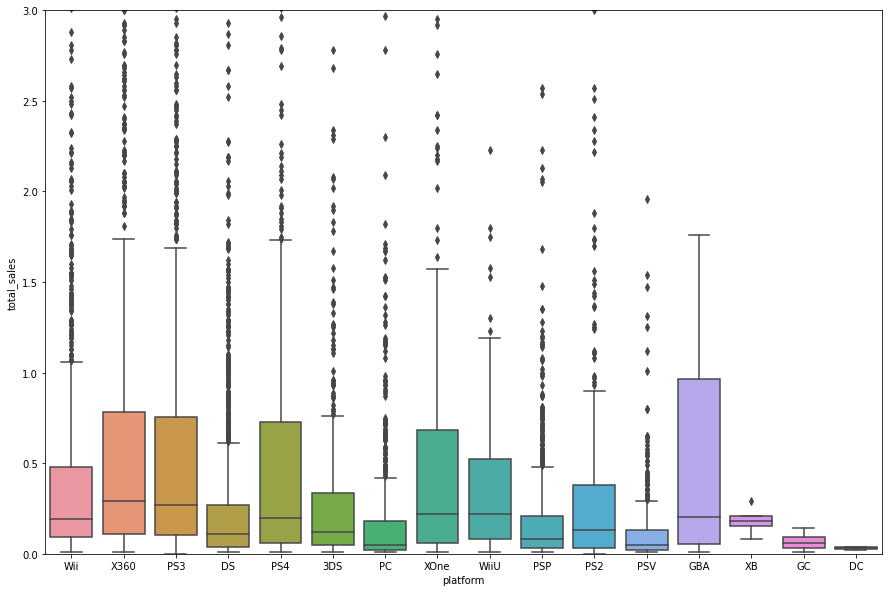

In [46]:
import seaborn as sns
plt.figure(figsize=(15,10))
sns.boxplot(x='platform', y='total_sales', data=df_rest)
plt.ylim(0,3)

<AxesSubplot:title={'center':'total_sales'}, xlabel='platform'>

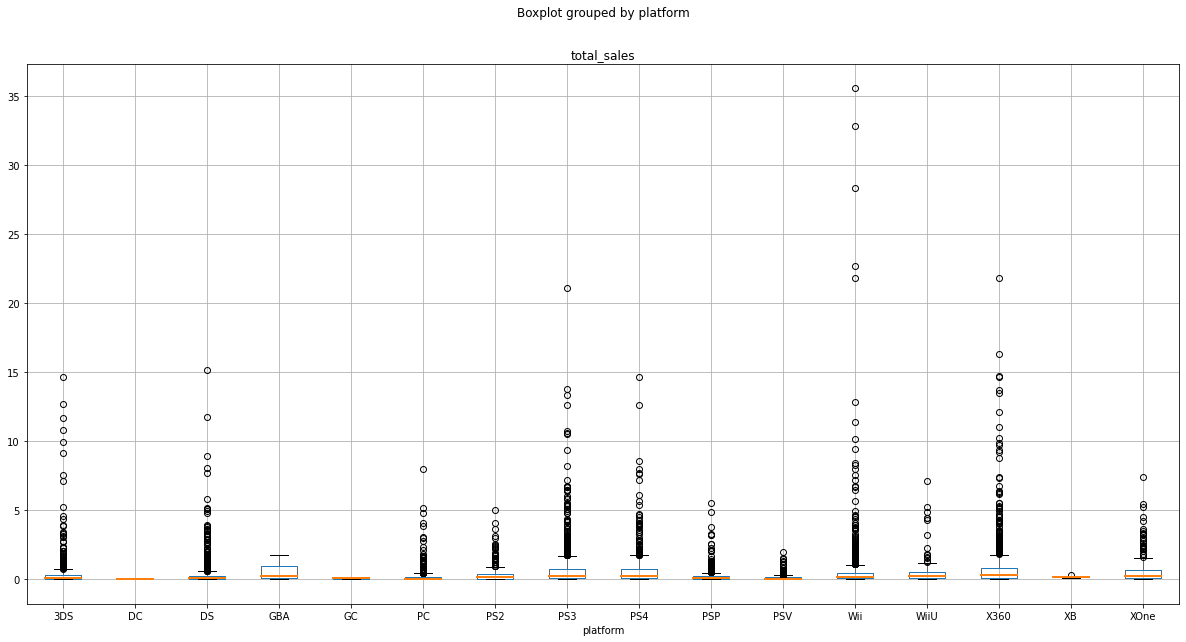

In [47]:
#Criação de diagrama de caixa para todas as plataformas.
df_rest.boxplot(column='total_sales', by='platform', figsize=(20, 10), medianprops={'linewidth': 2})

In [48]:
#Ciração de gráfico de dispersão por classificação das plataformas pelas vendas
ps4_sales = df_rest.loc[df['platform'] == 'PS4', ['platform', 'user_score', 'critic_score', 'total_sales']]

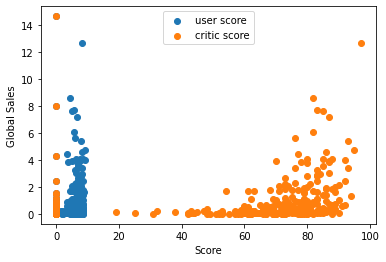

In [49]:
plt.scatter(ps4_sales['user_score'], ps4_sales['total_sales'], label='user score')
plt.scatter(ps4_sales['critic_score'], ps4_sales['total_sales'], label='critic score')
plt.xlabel('Score')
plt.ylabel('Global Sales')
plt.legend()
plt.show()

In [50]:
# Avaliando a correlaçõ entre as colunas
ps4_sales[['user_score', 'critic_score', 'total_sales']].corr()

,user_score,critic_score,total_sales
user_score,1.000000,0.906649,0.092428
critic_score,0.906649,1.000000,0.221822
total_sales,0.092428,0.221822,1.000000


### Conclusão intermediária
Temos uma média de vendas na América do Norte superior aos demais continentes. Há uma diferença muito grande nas médias de vendas do X360 para os demais nos últimos 10 anos, com a tabela de correlação conseguimos observar que há uma correlação diretamente proporcional ente `critic_score` e `user_score`.

## Avaliação de vendas por região

In [51]:
#Avaliando as vendas por região
region_platform_sales = df[['na_sales', 'eu_sales', 'jp_sales', 'platform']].copy()

In [52]:
region_platform_sales = region_platform_sales.groupby(['platform']).agg({
    'na_sales': 'sum',
    'eu_sales': 'sum',
    'jp_sales': 'sum'
}).reset_index()

In [53]:
region_platform_sales['na_share'] = region_platform_sales['na_sales'] / region_platform_sales['na_sales'].sum()
region_platform_sales['eu_share'] = region_platform_sales['eu_sales'] / region_platform_sales['eu_sales'].sum()
region_platform_sales['jp_share'] = region_platform_sales['jp_sales'] / region_platform_sales['jp_sales'].sum()

In [54]:
#top 5 vendas
top_5_na = region_platform_sales.sort_values('na_share', ascending=False).head(5)
top_5_eu = region_platform_sales.sort_values('eu_share', ascending=False).head(5)
top_5_jp = region_platform_sales.sort_values('jp_share', ascending=False).head(5)

In [55]:
top_5_na

,platform,na_sales,eu_sales,jp_sales,na_share,eu_share,jp_share
28,X360,599.15,269.79,12.33,0.137003,0.111682,0.009539
16,PS2,580.09,337.05,137.74,0.132644,0.139525,0.106564
26,Wii,494.01,261.48,69.05,0.112961,0.108242,0.053421
17,PS3,391.60,328.97,79.52,0.089544,0.136180,0.061521
4,DS,381.38,188.72,175.02,0.087207,0.078122,0.135406


In [56]:
top_5_eu

,platform,na_sales,eu_sales,jp_sales,na_share,eu_share,jp_share
16,PS2,580.09,337.05,137.74,0.132644,0.139525,0.106564
17,PS3,391.60,328.97,79.52,0.089544,0.136180,0.061521
28,X360,599.15,269.79,12.33,0.137003,0.111682,0.009539
26,Wii,494.01,261.48,69.05,0.112961,0.108242,0.053421
15,PS,334.72,212.39,139.78,0.076538,0.087921,0.108142


In [57]:
top_5_jp

,platform,na_sales,eu_sales,jp_sales,na_share,eu_share,jp_share
4,DS,381.38,188.72,175.02,0.087207,0.078122,0.135406
15,PS,334.72,212.39,139.78,0.076538,0.087921,0.108142
16,PS2,580.09,337.05,137.74,0.132644,0.139525,0.106564
23,SNES,61.23,19.04,116.55,0.014001,0.007882,0.090170
2,3DS,83.11,61.46,100.64,0.019004,0.025442,0.077861


### Conclusão intermediária
Possuímos uma maior venda de X350 no continente norte americano, PS2 muito vendido na Europa e DS mais vendido no Japão.

## Classificação por vendas

In [58]:
# Selecionando as colunas de interesse
cols = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'rating']

In [59]:
# Agrupando as vendas totais por classificação do ESRB e região
grouped_ESRB = df.groupby(['rating'])[['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'total_sales']].sum()


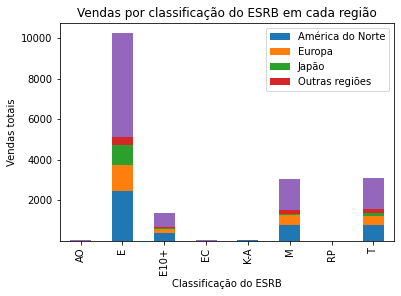

In [60]:
# Criando um gráfico de barras empilhadas para cada região
# Configurando as legendas e títulos do gráfico
# Exibindo o gráfico
grouped_ESRB.plot(kind='bar', stacked=True)

plt.title('Vendas por classificação do ESRB em cada região')
plt.xlabel('Classificação do ESRB')
plt.ylabel('Vendas totais')
plt.legend(['América do Norte', 'Europa', 'Japão', 'Outras regiões'])


plt.show()

### Conclusão intermediária
Através do gráfico fica nítido que uma maior quantidade de vendas dos profutos melhores ranqueados.

## Teste de hipóteses

Serão realizados dois testes de hipóteses, o primeiro:
* Com hipótese nula (H0): as classificações médias dos usuários das plataformas Xbox One e PC são as mesmas;
* Com hipótese alternativa (H1): as classificações médias dos usuários das plataformas Xbox One e Pc são diferentes.

In [61]:
#importando a biblioteca
from scipy.stats import ttest_ind

In [62]:
# Separando as classificações dos usuários para as plataformas XOne e PC em duas amostras diferentes
xone_ratings = df[df['platform'] == 'XOne']['user_score'].dropna()
pc_ratings = df[df['platform'] == 'PC']['user_score'].dropna()

In [63]:
# Calculando a estatística t e o valor-p
t, p_value = ttest_ind(xone_ratings, pc_ratings, equal_var=False)

In [64]:
# Imprimindo o valor-p
print("Valor-p: ", p_value)

Valor-p:  0.02850825251652578


In [65]:
# Verificando se a hipótese nula pode ser rejeitada
if p_value < 0.05:
    print("Rejeitamos a hipótese nula")
else:
    print("Não rejeitamos a hipótese nula")

Rejeitamos a hipótese nula


No segunto teste de hipótese, temos:
* Hipótese nula (H0): as classificações médias de usuários para os gêneros Action (ação) e Sports (esportes) são iguais;
* Hipótese alternativa (H1): as Classificações médias de usuários para os gêneros Action (ação) e Sport (esporte) são diferentes.

In [66]:
# Criando dois grupos separados para Action e Sports
action = df[df['genre'] == 'Action']['user_score']
sports = df[df['genre'] == 'Sports']['user_score']

In [67]:
# Realizando o teste t de duas amostras independentes
t_statistic, p_value = ttest_ind(action, sports, equal_var=False)

In [68]:
# Definindo o nível de significância
alpha = 0.05

In [69]:
# Verificando o resultado do teste
if p_value < alpha:
    print("Rejeitamos a hipótese nula. As médias das classificações dos usuários para os gêneros Action e Sports são diferentes.")
else:
    print("Não rejeitamos a hipótese nula. As médias das classificações dos usuários para os gêneros Action e Sports são iguais.")


Não rejeitamos a hipótese nula. As médias das classificações dos usuários para os gêneros Action e Sports são iguais.


## Conclusão Final
Os dados recebidos estavam em tipos diferentes com valores ausentes, colunas com cabeçalhos em letras maiúsculas com minúsculas, os dados foram alterados para seus respectivos tipos, os cabeçalhos foram ordenados para letras minúsculas e os valores ausentes foram tratados seguindo a seguinte lógica:

* A coluna `name` serviu para auxiliar no preenchimento das demais colunas com valores ausentes, entendendo que podemos ter valores que se repetem na coluna e podem aparecer em outra linha com valores ausentes;
* Os valores de score ficou entendido, por mim, que não houve o preenchimento pois o usuário não relacionou uma nota e portanto a nota seria 0.0;
* Os valores da coluna categórica `rating` possuía uma classificação, os valores foram substituídos pelo valor que mais se repete na coluna.
* Ainda possuíam 2 linhas na coluna `name` e `genre`, 148 linhas na coluna `year_of_release` , foi tomado a decisão de excluí-los pois não comprometeria os dados, pois não representam mais que 10% do total dos meus dados.

Os lançamentos dos jogos nos últimos 5 anos vem caindo, as maiores vendas se concentraram na América do Norte e as cinco plataformas mais vendidas, respectivamente, são: X360, PS2, Wii, PS3 e DS.

Para a avaliação dos dados foram restringidos o conjunto de dados dos últimos 10 anos para se construir um modelo para 2017. Para realização essa avaliação, apareceu um erro ´TBD´ e as colunas `user_score` e `year_of_release` foram alterados para float e int respectivamente, logo após foram realizados as restrições e criado o gráfico, através do gráfico ficou evidêciado que a plataforma mais vendida, de 2007 a 2013, foi PS3 e após 2013 o PS4.

Logo após, através dos gráficos de caixa, foi analisado que a média de vendas Norte americana foi superior ao dos demais locais e que as médias de vendas do X360 para os demais foi maior dentre os 10 anos, através da correlação ficou notado que há uma correlação diretamente proporcional entre `critic_score` e `user_score`. Logo após foram avaliadas as vendas por região e feito um top 5 em cada, os líderes de venda são:

* `na_sales`: X360;
* `eu_sales`: PS2;
* `jp_sales`: DS.

Em análise, foi feita o agrupamento de vendas por classificação e região e criado um gráfico, neste gráfico foi notado que temos maiores vendas dos produtos que temos uma melhor classificação, portanto, podemos dizer que a classificação e as vendas são diretamente proporcionais.

No teste de hipótese foram criadas dois testes para avaliação dos usuários das plataformas Xbox One e PC, segundo o teste, as classificações médias dos usuários das plataformas Xbox One e PC são diferentes. No segundo teste, ficou constatado que as médias das classificações dos usuários para o gênero Action e Sports são iguais.

